In [6]:
from logo import import_pmb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from concorde.tsp import TSPSolver

Shape of points:  (7739, 2)


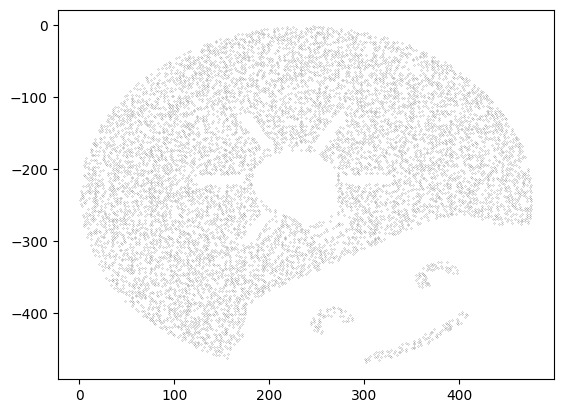

In [15]:
# Generate array of points from the PMB file
points_orig = import_pmb("RSA_logo_stippled.pbm", 480, 480, 1.0)
print("Shape of original points: ", points_orig.shape)
points = import_pmb("RSA_logo_stippled.pbm", 480, 480, 0.4)
print("Shape of reduced points: ", points.shape)
plt.figure()
plt.subplot(1,2,1)
plt.scatter(points_orig[:,0], points_orig[:,1], s=0.05, marker='.', color='black')
plt.title("Original points")
plt.subplot(1,2,2)
plt.scatter(points[:,0], points[:,1], s=0.05, marker='.', color='black')
plt.title("Reduced points")
plt.show()

Number of labels:  4


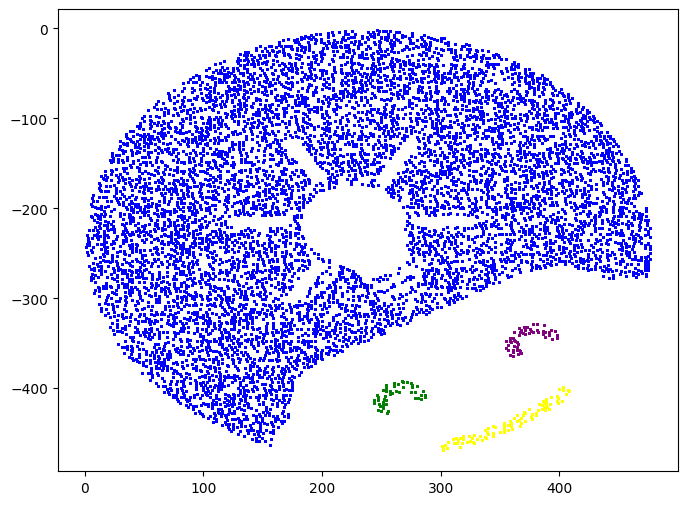

In [16]:
# Cluster the regions of points
own_colors = ["blue", "green", "yellow", "purple", "black", "lime", "orange", "cyan", "gray", "crimson", "gold", "pink"]
dbs = DBSCAN(eps=20, min_samples=3)
labels = dbs.fit_predict(points)
no_labels = len(np.unique(labels[labels != -1]))
print("Number of labels: ", no_labels)
plt.figure(figsize=(8,6))
for label in labels[labels != -1]:
    points_label = points[labels == label]
    plt.scatter(points_label[:,0], points_label[:,1], s=0.5, marker='.', color=own_colors[label])
plt.show()

In [17]:
# Apply TSP to each cluster
label_classes = np.unique(labels[labels != -1])
plt.figure(figsize=(8,6))
for label_class in label_classes:
    points_label = points[labels == label_class]
    if len(points_label) <= 1:
        continue
    density = 0.5
    points_label = points_label[::int(1.0/density)]
    solver = TSPSolver.from_data(points_label[:,0], points_label[:,1], norm="EUC_2D", name='RSA_logo')
    solution = solver.solve(verbose=False)
    assert solution.success

    path = points_label[solution.tour]
    plt.plot(path[:,0], path[:,1], linewidth=1.0, color='black')
plt.savefig('figure_lines.png', transparent=True)
plt.show()